In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [4]:
#plotly has inbuilt datasets which can be accessed using px.data
tips = px.data.tips()
iris = px.data.iris()
gapmin = px.data.gapminder()

In [5]:
#lets create subset of gapminder
gapmin_2007= gapmin[gapmin['year']==2007]

In [6]:
#lets create graph using go first to create graph we have to create figure first, which will have traces and layout. 
#Traces is our data for which we want to create the graph and layout will have layout properties like title, labels
#Traces is list object as we can have multiple data to be ploted on a single graph
#To show figure .show() method is used

#in Plotly scatter method is used to create scatter plot and line plot to make it scatter markers needs to be passed in mode

trace1=go.Scatter(x=gapmin_2007['lifeExp'],y=gapmin_2007['gdpPercap'])
data=[trace1]

layout = go.Layout(title='GDP Per Capita vs Life Expectency for 2007',xaxis={'title':'Life Expectancy'},yaxis={'title':'GDP Per Capita'})

fig=go.Figure(data,layout)
fig.show()

In [7]:
#for Scatter Plot
#this graph is interactive , we can hover over point to get more info
# we can zoom in , out download the image this all features are available

trace1=go.Scatter(x=gapmin_2007['lifeExp'],y=gapmin_2007['gdpPercap'],mode='markers')
data=[trace1]

layout = go.Layout(title='GDP Per Capita vs Life Expectency for 2007',xaxis={'title':'Life Expectancy'},yaxis={'title':'GDP Per Capita'})

fig=go.Figure(data,layout)
fig.show()

In [8]:
##### lets try to build multiple plots on the same graph
trace1=go.Scatter(x=gapmin_2007['lifeExp'],y=gapmin_2007['gdpPercap'],mode='markers')
trace2=go.Scatter(x=[20,40,45],y=[20000,40000,10000],mode='lines')
data=[trace1,trace2]

layout = go.Layout(title='GDP Per Capita vs Life Expectency for 2007',xaxis={'title':'Life Expectancy'},yaxis={'title':'GDP Per Capita'})

fig=go.Figure(data,layout)
fig.show()


So we can see have to write too much line to code to create one graph which give birth to plotly express

In [10]:
#lets plot same scatter plot using plotly express
#this will not provide all the customization which we get from graph objects
px.scatter(gapmin_2007,x='lifeExp',y='gdpPercap')

In [11]:
# we can add third level information also like continent using color
#y clicking on the continent in the legend we can toggle its data on and off on the graph
px.scatter(gapmin_2007,x='lifeExp',y='gdpPercap',color='continent')

In [12]:
# we can add fourth information using the size parameter
px.scatter(gapmin_2007,x='lifeExp',y='gdpPercap',color='continent',size='pop')

In [13]:
#to increase the size of bubble keeping their relative size as it is we can use size_max
px.scatter(gapmin_2007,x='lifeExp',y='gdpPercap',color='continent',size='pop',size_max=100)

In [14]:
#on hover we want it should show the name of the country for that we can use hover_name
px.scatter(gapmin_2007,x='lifeExp',y='gdpPercap',color='continent',size='pop',size_max=100,hover_name='country')

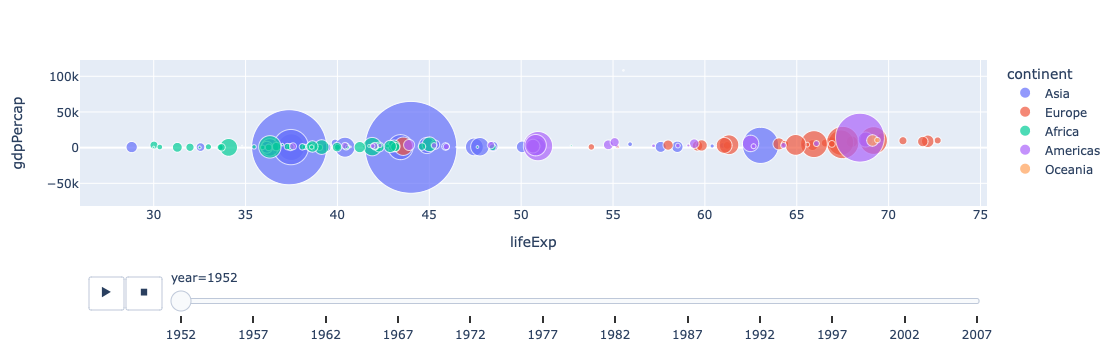

In [15]:
#We can also create a animation graph which will show the year wise data for all the countries 
#animation_frame the defines the frame or window of the animation
#When you're creating an animated Plotly chart, like an animated bar chart or scatter plot over time, 
#Plotly uses animation_frame to determine the sequence (e.g. years or months), and animation_group helps it know 
#which data points belong to the same entity across frames.
#Without it, Plotly might think each frame contains entirely new data and won’t animate transitions smoothly.
px.scatter(gapmin,x='lifeExp',y='gdpPercap',color='continent',size='pop',size_max=100,hover_name='country',animation_frame='year',
          animation_group='country')

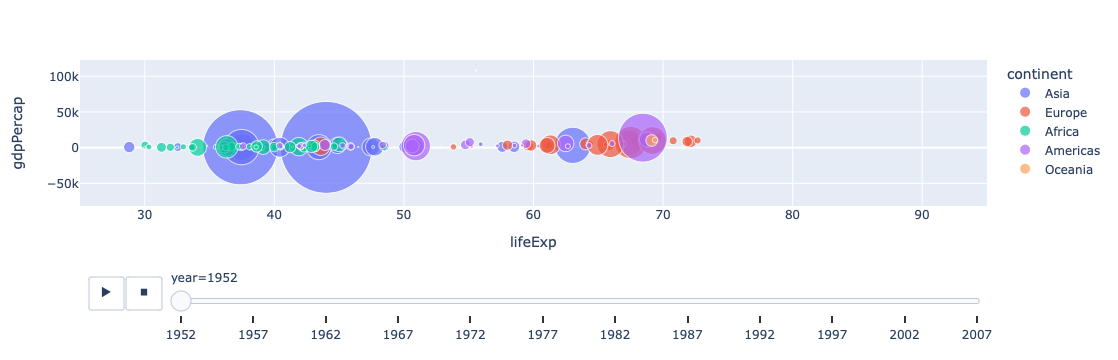

In [16]:
#lets change the range of x as we can see in the above graph it seems too concentrated in the right
px.scatter(gapmin,x='lifeExp',y='gdpPercap',color='continent'
           ,size='pop',size_max=100
           ,hover_name='country'
           ,animation_frame='year',
          animation_group='country',
          range_x=[25,95])

In [17]:
# To give title we can use title parameter
px.scatter(gapmin,x='lifeExp',y='gdpPercap',color='continent'
           ,size='pop',size_max=100
           ,hover_name='country'
           ,animation_frame='year',
          animation_group='country',
          range_x=[25,95],
          title='Life Exp vs GDP Per Capita')

In [18]:
#Line plot these are best for time series data
gapmin_india= gapmin[gapmin['country']=='India']
px.line(gapmin_india,x='year',y='lifeExp',title='India Life Expectancy over the year')

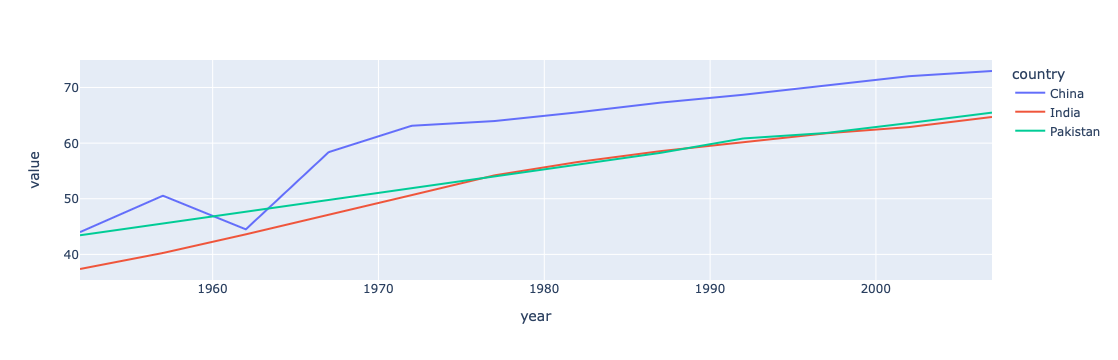

In [56]:
# to plot multiple lineplots in plotly, Plotly expects each data should be present in separate columns 
#therefore we have to move the countries from row to column
gapmin_sub = gapmin[gapmin['country'].isin(['India','China','Pakistan'])].pivot(index='year',columns='country',values='lifeExp')
px.line(gapmin_sub,x=gapmin_sub.index,y=gapmin_sub.columns)

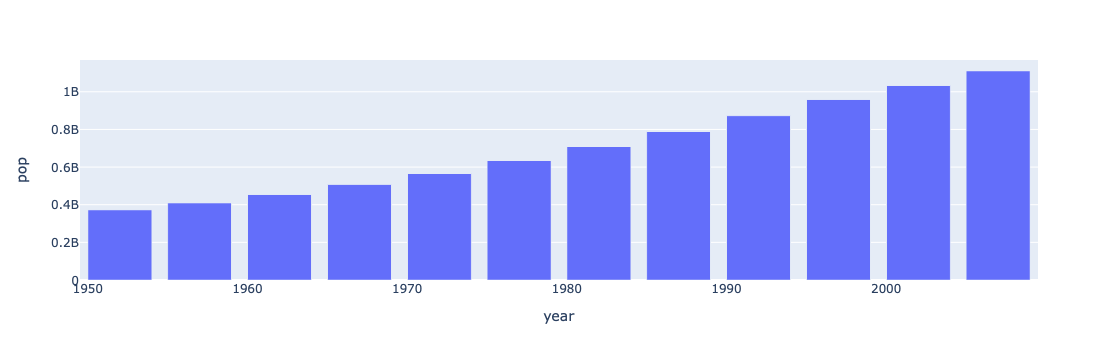

In [58]:
#bar chart in plotly
px.bar(gapmin_india,x='year',y='pop')

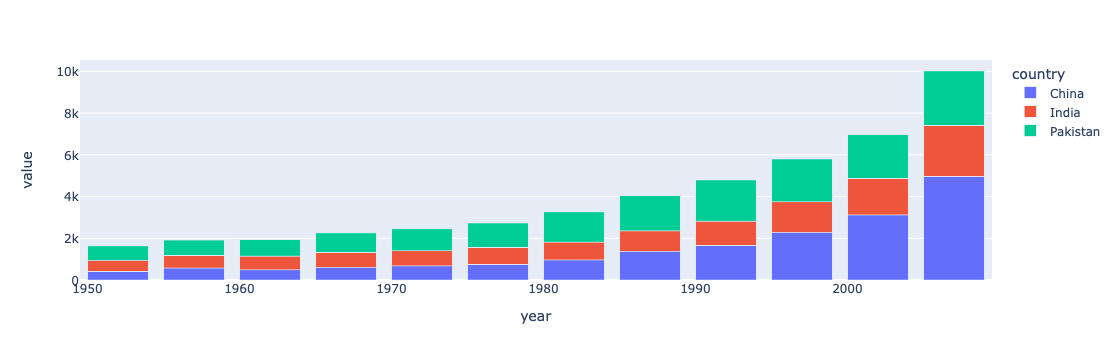

In [60]:
#Grouped barchart using plotly
#by default it will create stacked bar chart
gapmin_sub_gdp = gapmin[gapmin['country'].isin(['India','China','Pakistan'])].pivot(index='year',columns='country',values='gdpPercap')
px.bar(gapmin_sub_gdp,x=gapmin_sub_gdp.index,y=gapmin_sub_gdp.columns)

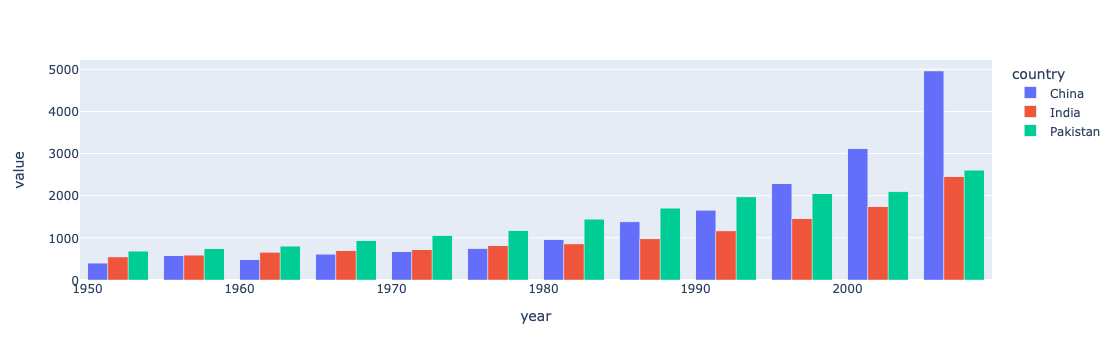

In [66]:
# to create separate bars
px.bar(gapmin_sub_gdp,x=gapmin_sub_gdp.index,y=gapmin_sub_gdp.columns,barmode='group')

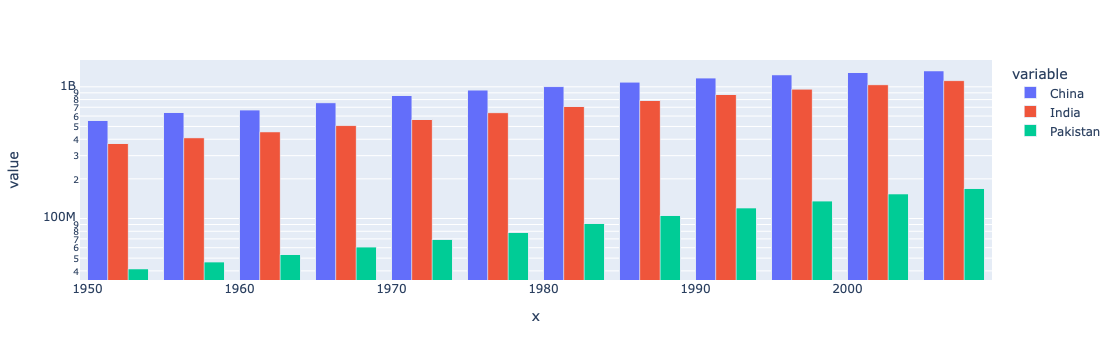

In [74]:
# sometimes relative values are very high example population of India & China are much more than pakistan there to show graph better we can use log scale
gapmin_sub_pop = gapmin[gapmin['country'].isin(['India','China','Pakistan'])].pivot(index='year',columns='country',values='pop')
#px.bar(gapmin_sub_pop,x=gapmin_sub.index,y=gapmin_sub.columns,barmode='group')
px.bar(gapmin_sub_pop,x=gapmin_sub.index,y=gapmin_sub.columns,barmode='group',log_y=True)


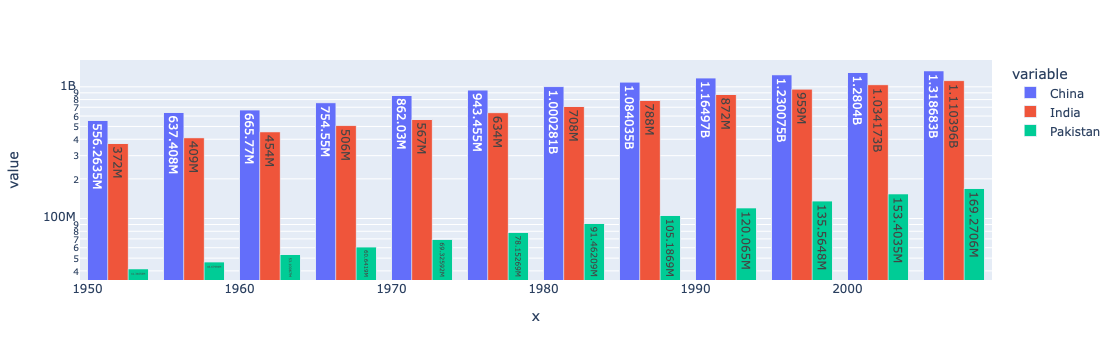

In [78]:
#we can show the values on the bar of the chart
px.bar(gapmin_sub_pop,x=gapmin_sub.index,y=gapmin_sub.columns,barmode='group',log_y=True,text_auto=True)

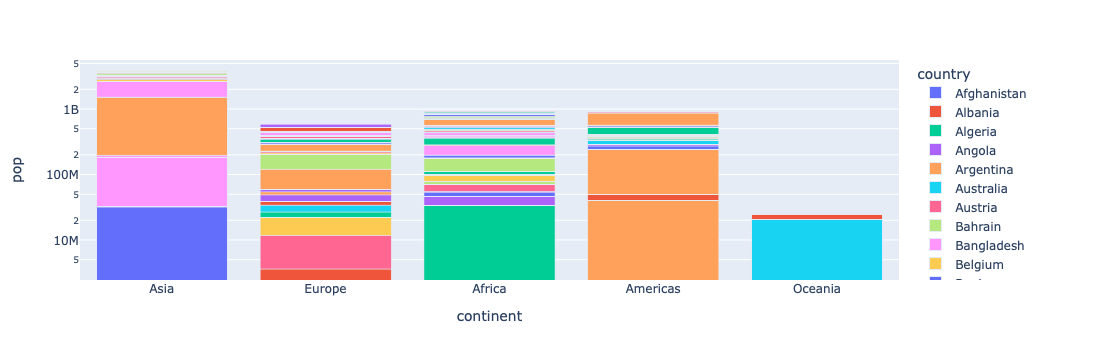

In [82]:
#stacked bar chart for continent_wise population and each countries contribution in it, to normalise the scale we have to use to log scale
px.bar(gapmin_2007,x='continent',y='pop',color='country',log_y=True)

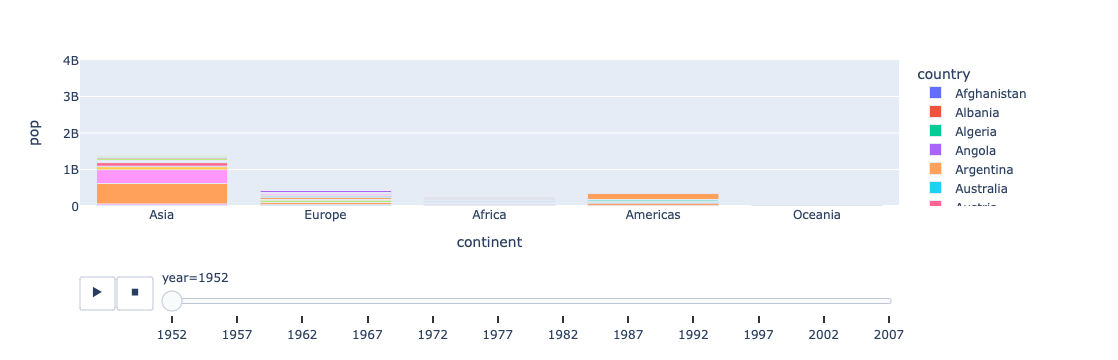

In [98]:
#Animation in barchart, we have passes the range of y so that we can proper animation and visualisation
px.bar(gapmin,x='continent',y='pop',color='country',animation_frame='year',animation_group='country',range_y=[0,4000000000])

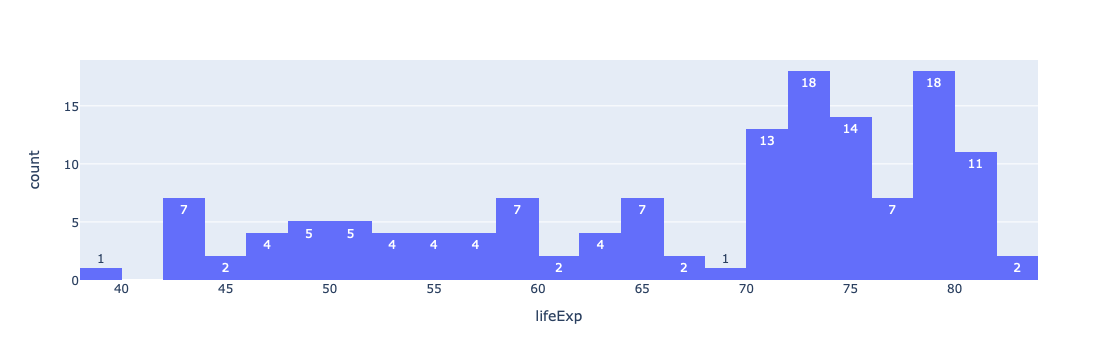

In [106]:
#histogram using nbins we can change the bin size, text_auto to show data on the bars
px.histogram(gapmin_2007,x='lifeExp',nbins=30,text_auto=True)

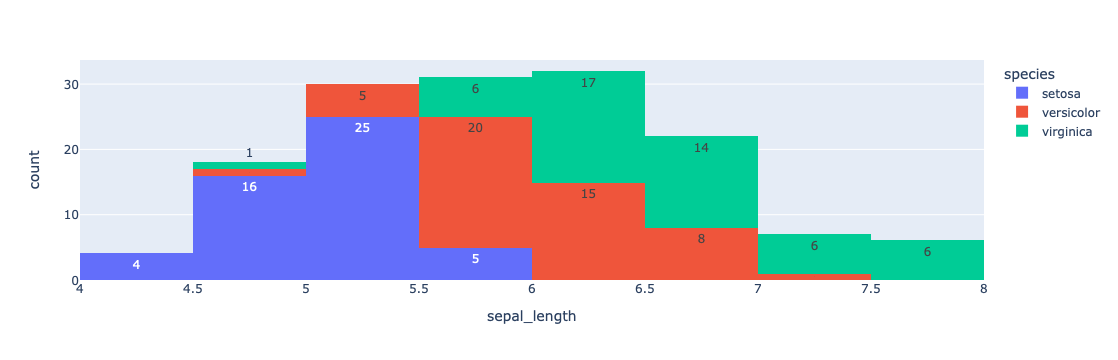

In [112]:
#plot mulitple histograms
px.histogram(iris,x='sepal_length',color='species',text_auto=True)

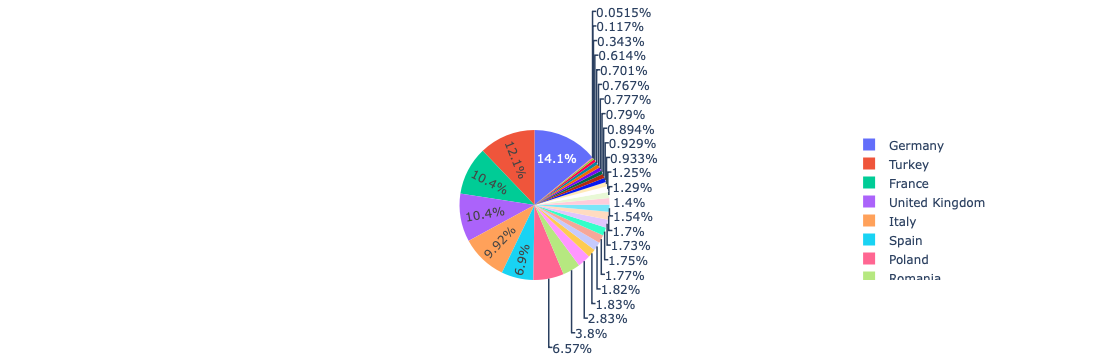

In [114]:
#pie chart , in pie chart we have pull also which will explode a pie of the chart
gapmin_2007_EU=gapmin_2007[gapmin_2007['continent']=='Europe']
px.pie(gapmin_2007_EU,names='country',values='pop')

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



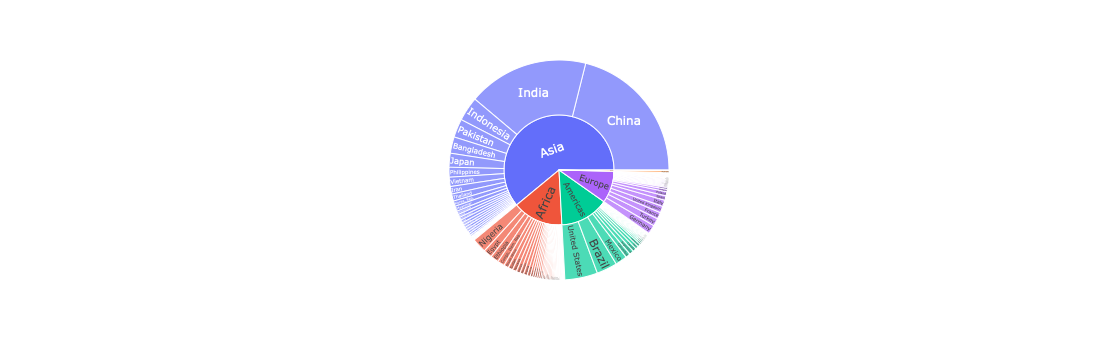

In [116]:
# Sunburst
# A sunburst chart is a type of chart used to visualize hierarchical data, displaying relationships 
# between categories and subcategories in a circular format
# here path will allows us to create the order of hierarchy first continent data then country data will be plotted.

px.sunburst(gapmin_2007,path=['continent','country'],values='pop')

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



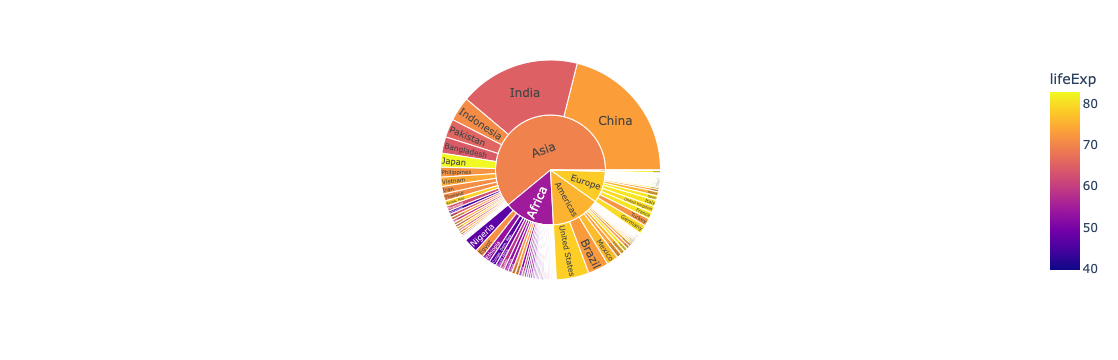

In [118]:
# we can also plot one more field or column using color parameter
px.sunburst(gapmin_2007,path=['continent','country'],values='pop',color='lifeExp')

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



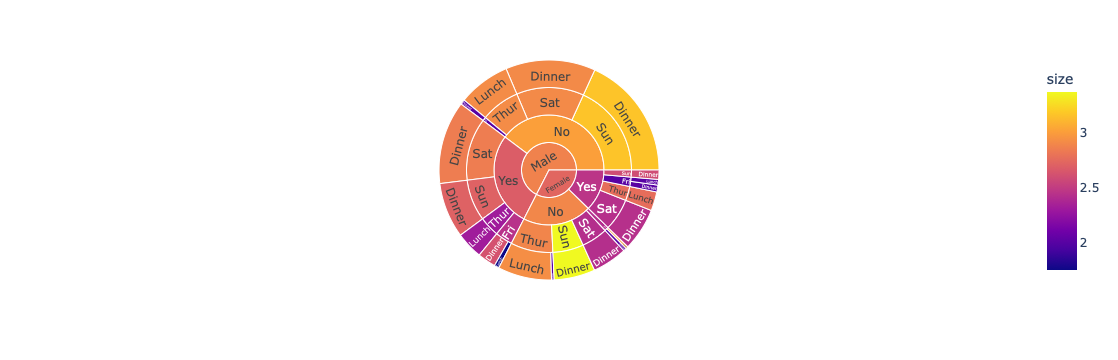

In [122]:
px.sunburst(tips,path=['sex','smoker','day','time'],values='total_bill',color='size')

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/divyanshuchaturvedi/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



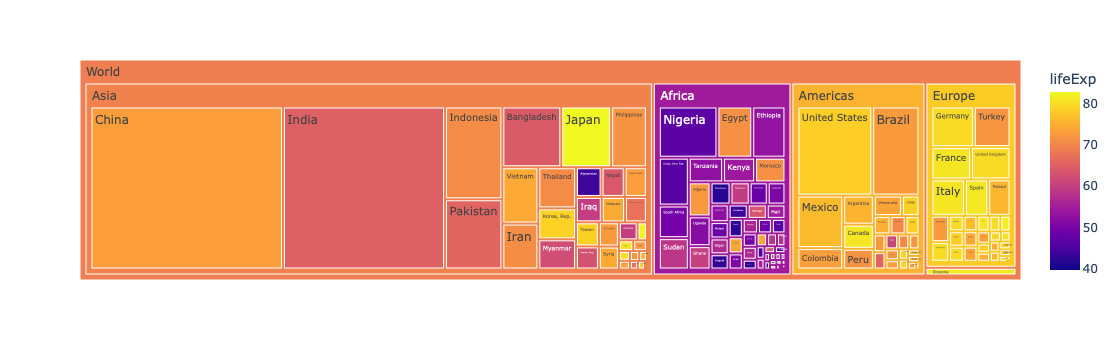

In [124]:
# Treemap, it is also used to show hierarchical data. For treemap in path we have to provide overall value, for that
# we will createa constant value World

px.treemap(gapmin_2007,path=[px.Constant('World'),'continent','country'],values='pop',color='lifeExp')

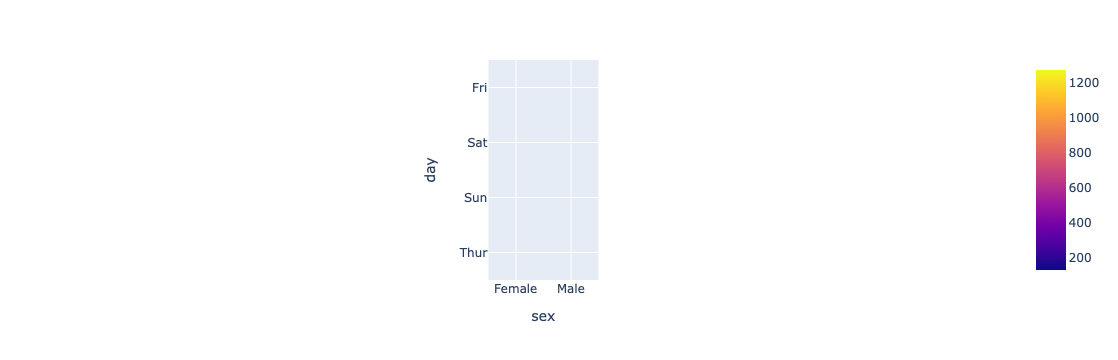

In [128]:
# heatmap used to show numnerical value over two categorical column
tips_pvt=tips.pivot_table(index='day',columns='sex',values='total_bill',aggfunc='sum')
px.imshow(tips_pvt)

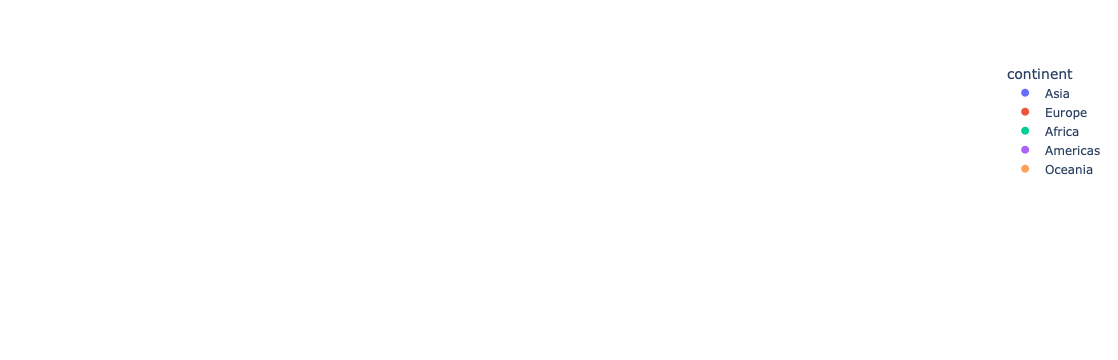

In [136]:
#3d scatter plot
px.scatter_3d(gapmin_2007,x='lifeExp',y='pop',z='gdpPercap',color='continent',log_y=True,hover_name='country')

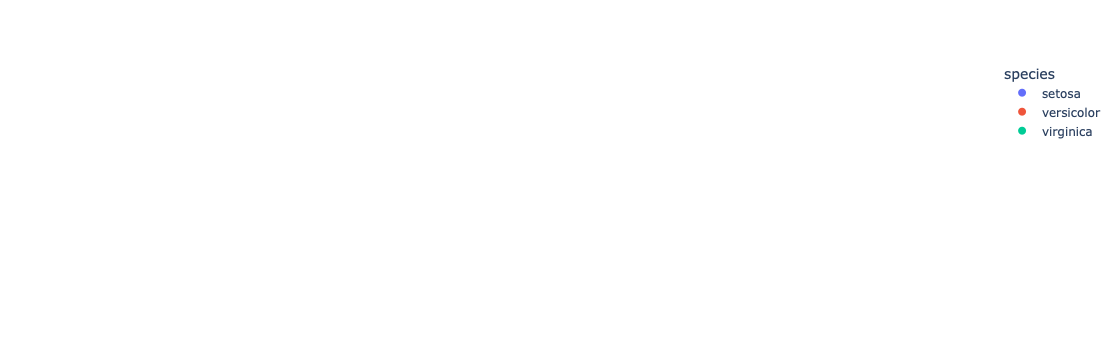

In [138]:
#scatter plot 3D sceond graph
px.scatter_3d(iris,x='sepal_width',y='sepal_length',z='petal_length',color='species')

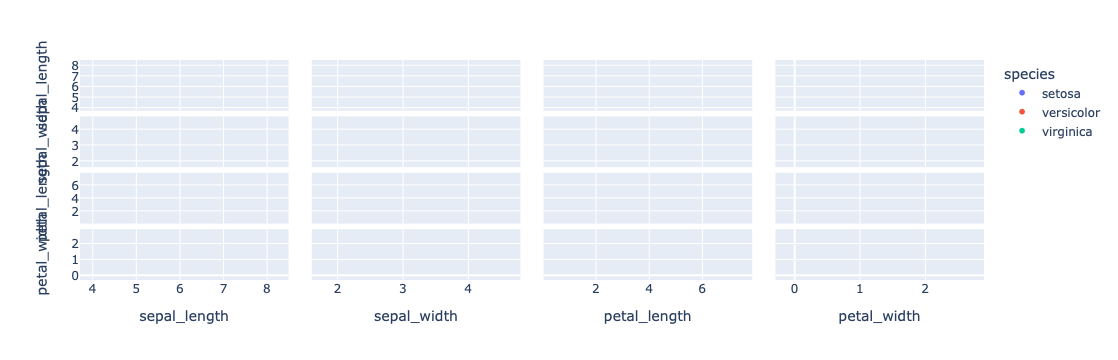

In [144]:
# scatter matrix is used to create scatter plots between the dimensions
px.scatter_matrix(iris,dimensions=['sepal_length','sepal_width','petal_length','petal_width'],color='species')